# **17 September 2023**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl

In [ ]:
canada="/content/Canada.xlsx"

data=pd.read_excel(canada,
                   sheet_name="Canada by Citizenship",
                   skiprows = range(20),
                   skipfooter= 2
                   )

# Setting kolom maksimal
pd.set_option('display.max_columns', None)


# Melakukan pengolahan pada dataframe
data = data.rename(columns={'OdName': 'Country', 'REG': 'Regional', 'DEV': 'Development', 'AreaName':'Benua', 'DevName':'Status'})

data.drop(["Type","AREA","Regional","Development","Coverage"], axis=1, inplace=True)

data.set_index("Country", inplace=True)

# Merubah judul kolom menjadi string dan membuat variabel tahun
data.columns = list(map(str, data.columns))
years= list(map(str, range(1980, 2014)))


# Membuat kolom "Total/Country tahun 1980-2013"

data["Total"] = data.sum(axis=1)

data.head(6)




<ipython-input-212-58ce967d8c9d>:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data["Total"] = data.sum(axis=1)


,Benua,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45,2113


# **Line Plot**

## **Contoh 1**

In [ ]:
angola =data.loc["Angola", years].plot()

plt.show()

NameError: ignored

In [ ]:
haiti =data.loc["Haiti", years].plot(figsize=(10,8))
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


# annotate the 2010 Earthquake ((koordinatx, koordinat y, "text"))
plt.text(1995, 5000, '2010 Earthquake')

plt.show()



## **Contoh 2**

In [ ]:
# Dari 2 negara

negara= data.loc[["Indonesia","Malaysia"], years].transpose()
negara

In [ ]:
negara.plot(kind='line')


plt.title("Immigrant from Indonesia and Malaysia")
plt.xlabel("Years")
plt.ylabel("People")

plt.text(2000, 1500,"Cricis 1998")


plt.show()

## **Contoh 3** Top 5 Country

In [ ]:
# Persiapkan data

data.sort_values(by="Total",ascending=False, axis=0, inplace= True)

data.head(5)

top_5 = data[0:5]

#angola =data.loc["Angola", years].plot()

top_5= top_5[years].transpose()
top_5

In [ ]:
top_5.plot(kind="line", figsize= (14,7))

plt.title("Top Immigrant in Canada by Origin")
plt.xlabel("Year")
plt.ylabel("People")

plt.show()

# **Area Plots**

- **stacked** =False, jika nggak warna areanya akan jelek karena saling bertumpukkan.

## **Contoh 1 (Paling Banyak Berdasarkan Negara)**

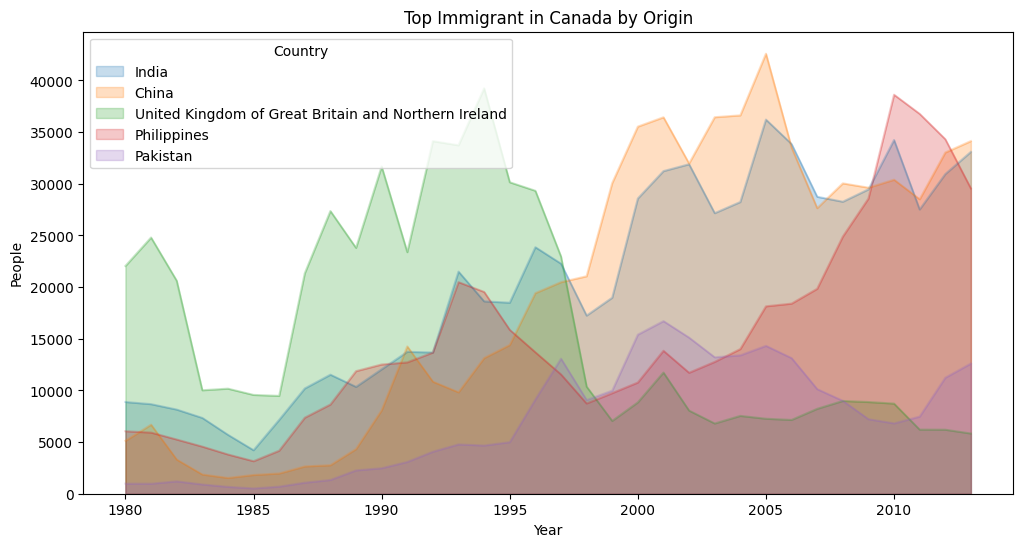

In [ ]:

top_5.plot( kind="area",
           alpha= 0.25,
           figsize=(12,6),
           stacked= False
)

plt.title("Top Immigrant in Canada by Origin")
plt.xlabel("Year")
plt.ylabel("People")

plt.show()


## **Contoh 2 (Paling Banyak Berdasarkan Benua)**

In [ ]:
# Siapkan data terlebih dahulu

benua = data.groupby("Benua").sum().sort_values(ascending=False, by="Total")

benua= benua.head(3)
benua= benua[years].transpose()
benua.head(3)


<ipython-input-220-8e18734e0444>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  benua = data.groupby("Benua").sum().sort_values(ascending=False, by="Total")


Benua,Asia,Europe,Latin America and the Caribbean
1980,31025,39760,13081
1981,34314,44802,15215
1982,30214,42720,16769


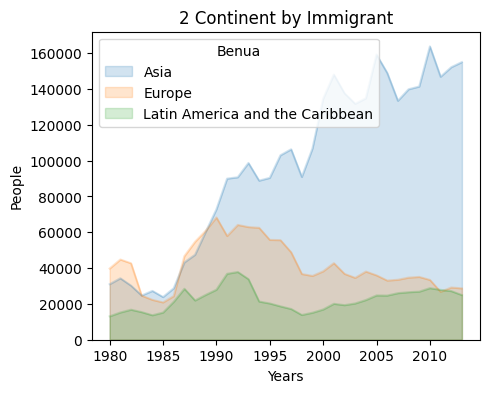

In [ ]:
# Visualisasikan data

benua.plot(kind='area',
           stacked = False,
           alpha=0.2,
           figsize=(5,4)
)

plt.title("2 Continent by Immigrant")
plt.xlabel("Years")
plt.ylabel("People")


plt.show()

# **Histogram**

## **Contoh 1 pada status negara berkembang**

**count, bin_edges = np.histogram(df_can['2013'])**

count dan bin_edges adalah variabel yang digunakan untuk menyimpan hasil dari fungsi np.histogram(). Fungsi ini digunakan untuk menghitung histogram dari data yang diberikan.

- count adalah array yang berisi frekuensi kemunculan data dalam setiap bin histogram.

- bin_edges adalah array yang berisi batas-batas interval yang digunakan dalam histogram.
Dalam kasus ini, np.histogram(df_can['2013']) menghitung histogram dari kolom ‘2013’ pada DataFrame df_can. Hasilnya adalah array count dan array bin_edges.


In [ ]:
# Persiapkan dat
dev= data.groupby("Status").sum().sort_values(by="Total")
#dev=dev.loc["Developing regions"].transpose()


years2= list(map(str, range(2003, 2014)))
dev= dev[years2].transpose()


count, bin_edges = np.histogram(dev, 15)



<ipython-input-222-dc20b7218db1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dev= data.groupby("Status").sum().sort_values(by="Total")


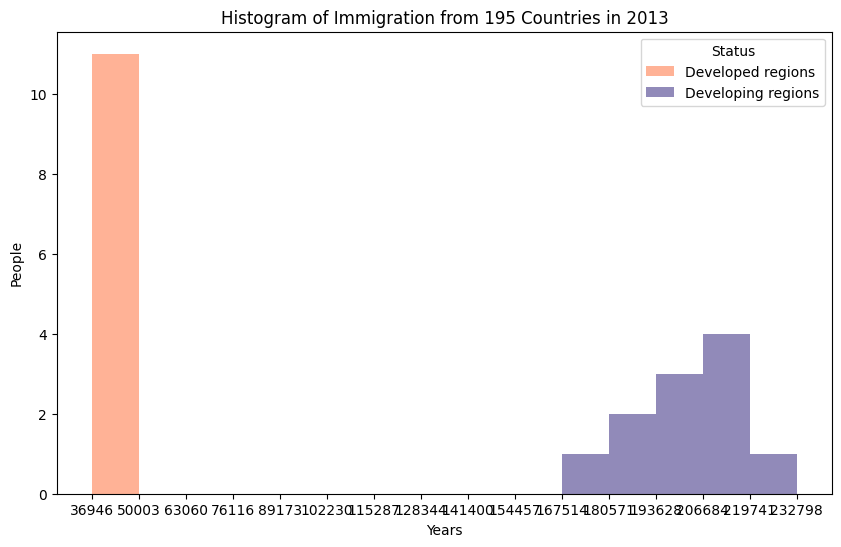

In [ ]:
# Mulai mempersiapkan histogram

dev.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.6,
         xticks=bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('People')
plt.xlabel('Years')

plt.show()


# **Bar Charts**

## **Contoh 1 => Imigran dari Iceland**

In [ ]:
iceland = data.loc['Iceland', years]
iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

**The first plt.annotate() call:**

- xy=(32, 70): The point on the plot where the arrow will point to.
- xytext=(28, 20): The position of the text label.
- xycoords='data': The coordinate system used for xy.
- arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2): Properties of the arrow, such as its style, connection style, color, and line width.

**The second plt.annotate() call:**

- xy=(28, 30): The point on the plot where the arrow will point to.
- rotation=72.5: The rotation angle of the text label.
- va='bottom': The vertical alignment of the text label.
- ha='left': The horizontal alignment of the text label.

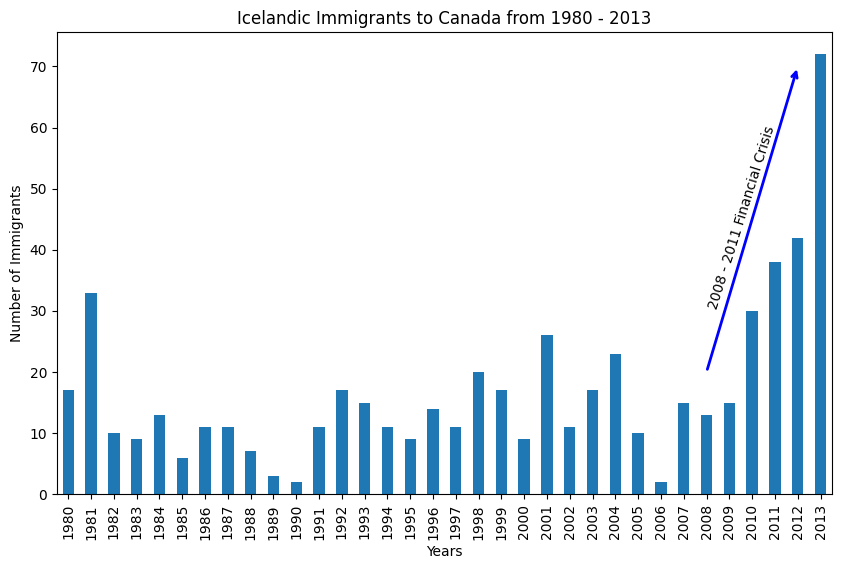

In [ ]:
iceland.plot(kind='bar', figsize=(10,6))

plt.title('Icelandic Immigrants to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.annotate('',
            xy=(32,70),
            xytext=(28, 20),
            xycoords='data',
            arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis',
            xy=(28, 30),
            rotation=72.5,
             va='bottom',
             ha='left'
            )

plt.show()

## **Contoh 2=>Imigran dari negara berkembang**

<ipython-input-226-ecacfc4b69bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dev= data.groupby("Status").sum()


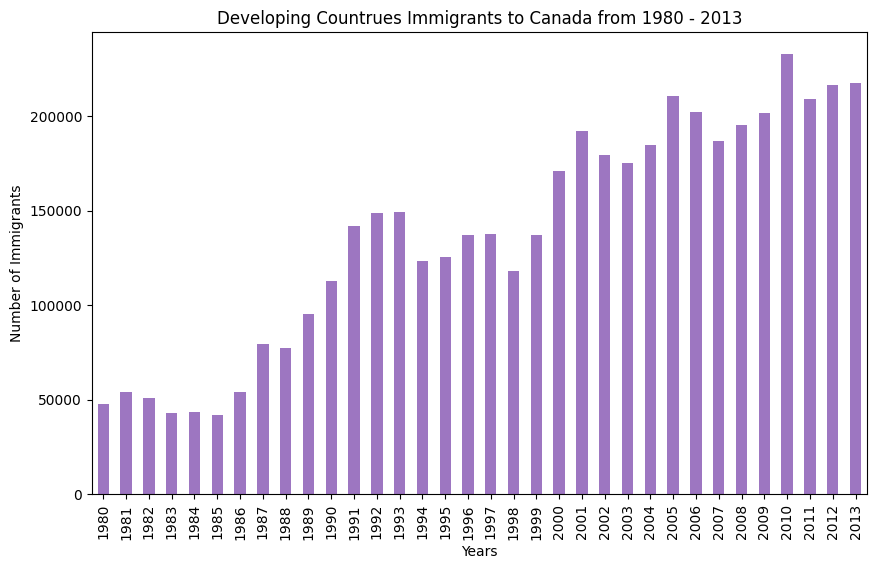

In [ ]:
dev= data.groupby("Status").sum()
dev=dev.drop("Total", axis=1)
dev=dev.loc["Developing regions"].transpose()


dev.plot(kind='bar', figsize=(10,6), color= "#9D76C1")

plt.title('Developing Countrues Immigrants to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## **Contoh 3, tipe = barh** => Top 15 country

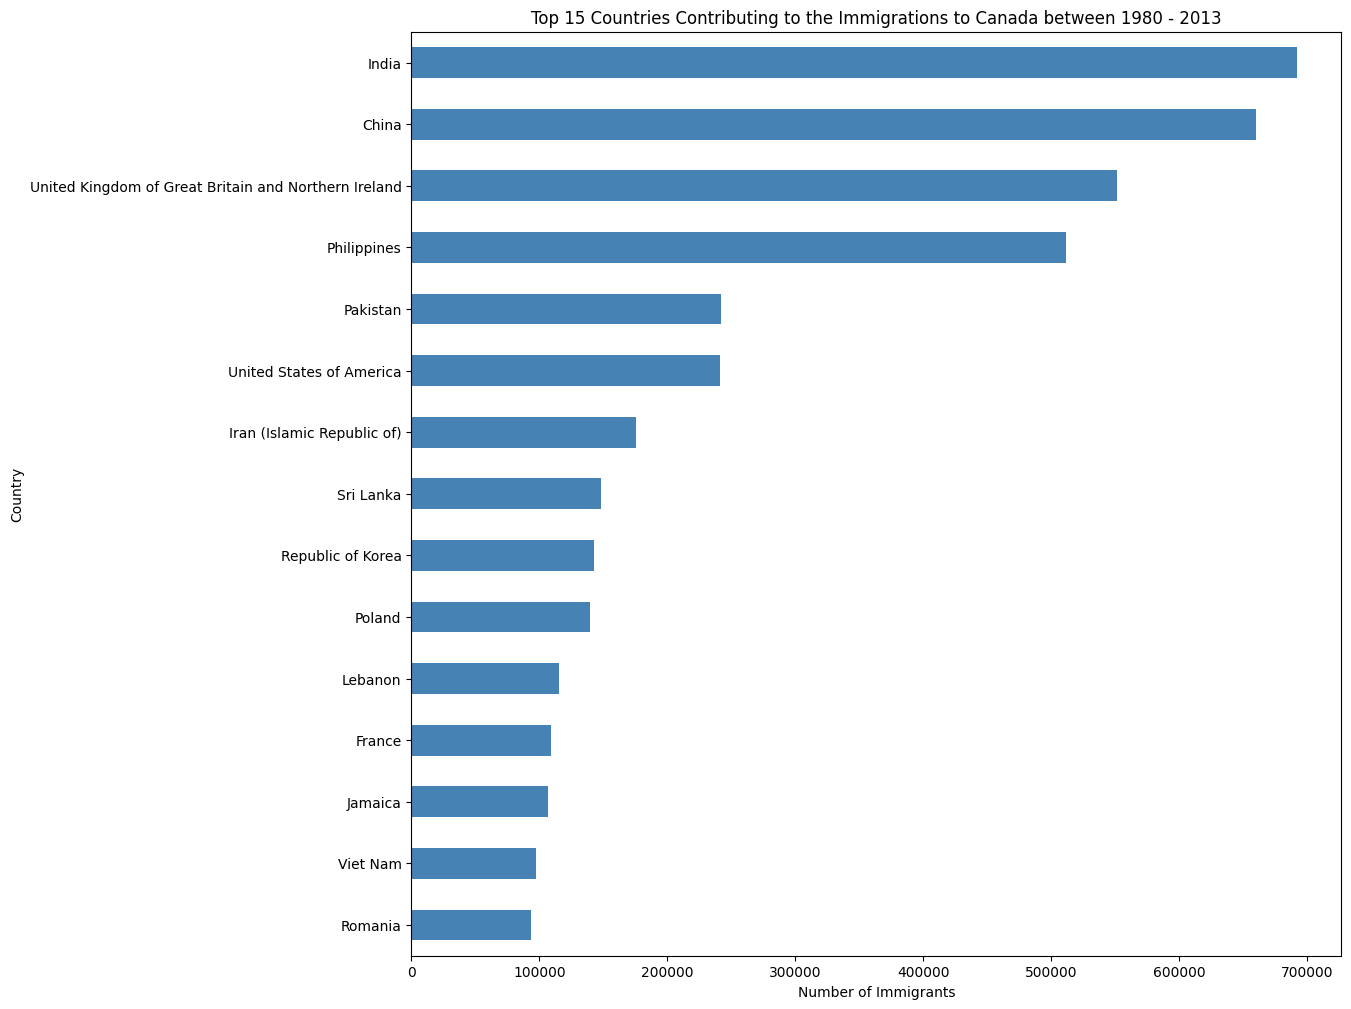

In [ ]:
top_15 = data['Total'].head(15)

top_15.sort_values(inplace=True)


top_15.plot(kind='barh',
             figsize=(12, 12),
             color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigrations to Canada between 1980 - 2013')

plt.show()

# **Pie Charts**

## **Contoh 1** => Berdasarkan status negara

In [ ]:
status= data.groupby("Status").sum()

status

<ipython-input-228-593fd9fda274>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  status= data.groupby("Status").sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,75465,65368,72649,72520,70325,62359,63070,55322,42678,42605,45469,50634,43620,42137,47325,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,112589,142141,149038,149529,123340,125353,137015,137563,118049,137213,171243,192009,179491,175160,184758,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


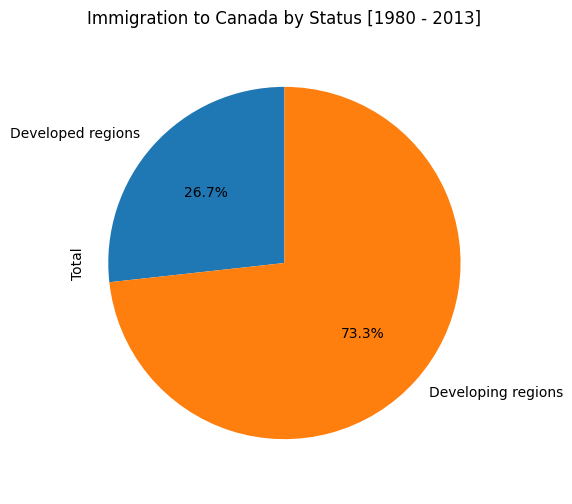

In [ ]:
status['Total'].plot(kind='pie',
                          figsize=(5,6),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=False)

plt.title('Immigration to Canada by Status [1980 - 2013]')
plt.axis('equal')

plt.show()

Jika ingin **pie dengan bentuk lain**, maka bisa menggunakan kode seperti di bawah :



Berikut adalah penjelasan kode tersebut:

- color_list adalah daftar warna yang digunakan untuk setiap benua.
- explode_list adalah daftar nilai yang digunakan untuk memisahkan setiap benua dari pusat diagram pie.
- df_continent['2013'] memilih data untuk tahun 2013 dari dataframe df_continent.
- plot(kind='pie', figsize=(15,10), autopct='%1.1f%%', startangle=90, shadow=True, labels =None, pctdistance=1.1, colors=color_list, explode=explode_list) membuat diagram pie dengan parameter berikut:
  - kind='pie': menentukan bahwa kita ingin membuat diagram pie.
  - figsize=(15,10): menentukan ukuran gambar.
  - autopct='%1.1f%%': menentukan bahwa kita ingin menampilkan persentase setiap benua dalam diagram pie.
  - startangle=90: menentukan sudut di mana kita ingin mulai menggambar diagram pie.
  - shadow=True: menentukan bahwa kita ingin efek bayangan untuk setiap irisan dalam diagram pie.
  - labels =None: menentukan bahwa kita tidak ingin ada label untuk setiap irisan dalam diagram pie.
  - pctdistance=1.1: menentukan jarak antara setiap irisan dan nilai persentasenya.
  - colors=color_list: menentukan warna untuk setiap irisan dalam diagram pie.- explode=explode_list: menentukan seberapa jauh kita ingin memisahkan setiap irisan dari pusat diagram pie.
  
Terakhir,
- plt.title('Immigration to Canada by Continent [1980 - 2013]') memberikan judul untuk diagram pie.
- plt.axis('equal') memastikan bahwa diagram pie digambar sebagai lingkaran.

plt.legend(labels=data.index, loc='upper left') adalah kode yang digunakan untuk menambahkan legenda pada diagram pie yang dihasilkan. Fungsi ini memiliki dua parameter utama:

- labels: Parameter ini digunakan untuk menentukan label yang akan ditampilkan di legenda. Pada kode yang Anda berikan, data.index digunakan sebagai nilai parameter ini. data.index mungkin merujuk pada indeks dari suatu dataframe atau array yang berisi label untuk setiap irisan dalam diagram pie.
- loc: Parameter ini digunakan untuk menentukan lokasi legenda dalam diagram pie. Pada kode yang Anda berikan, nilai 'upper left' digunakan untuk menempatkan legenda di sudut kiri atas diagram pie.

Semoga ini membantu!



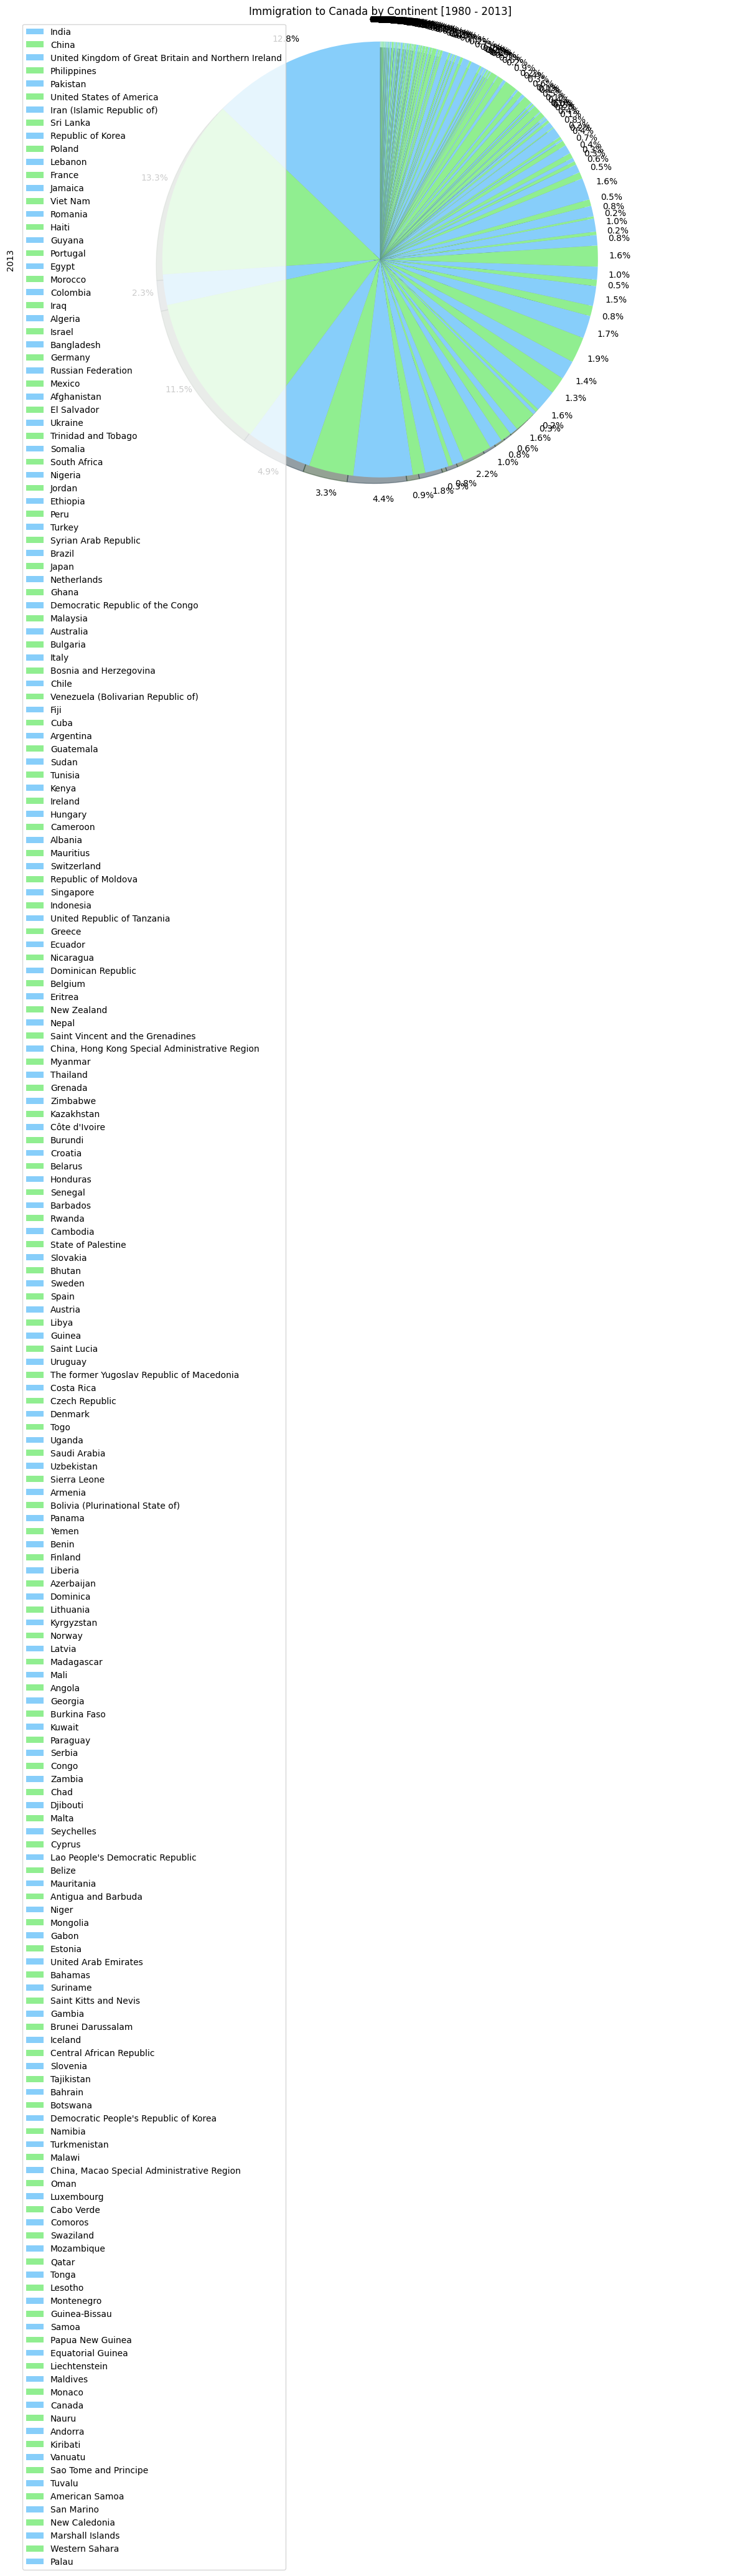

In [ ]:
color_list = ['lightskyblue', 'lightgreen']
#explode_list = [0.1, 0.5,0.6,0.6, 0.7, 0.1]

data['2013'].plot(kind='pie',
                          figsize=(15,10),
                          autopct='%1.1f%%',
                          startangle=90,
                          shadow=True,
                          labels =None,
                          pctdistance=1.1,
                          colors=color_list)
                          #explode=explode_list)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.legend(labels=data.index, loc='upper left')

plt.show()

# **Box Plot**

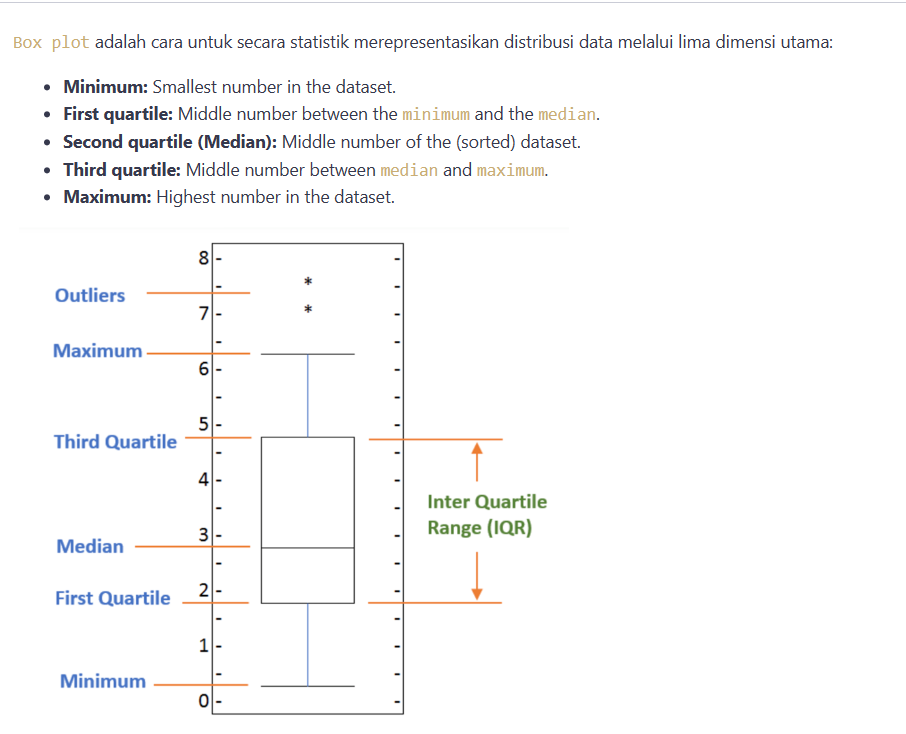

## **Kegunaan**

Box plot adalah **metode untuk menampilkan sebaran, kemencengan, dan penyebaran kelompok data numerik.**


Box plot dapat digunakan untuk:
- Menampilkan sebaran data secara visual.
- Mengidentifikasi adanya outliers dalam data.
- Membandingkan distribusi data antara beberapa grup atau kategori4

Data hasil box plot dapat **dibandingkan** dengan hasil dari **describe()**.

### **Contoh 1** => 1 box plot

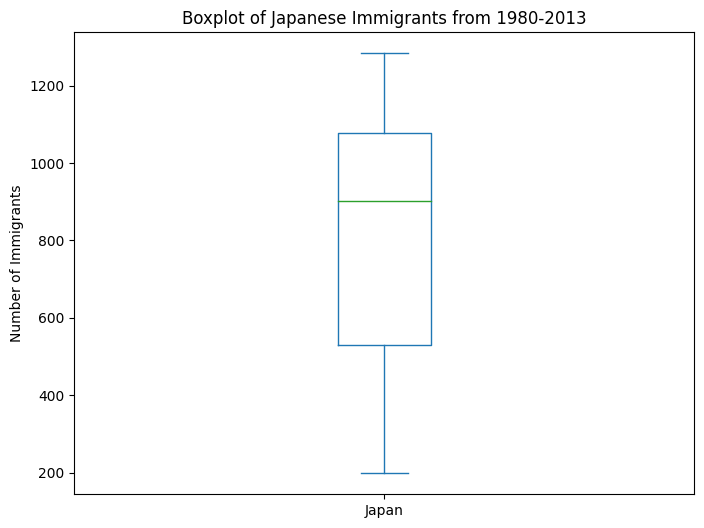

In [ ]:
japan = data.loc[['Japan'], years].transpose()


japan.plot(kind='box', figsize=(8,6))

plt.title('Boxplot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:
japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


### **Contoh 2** => 2 box plot

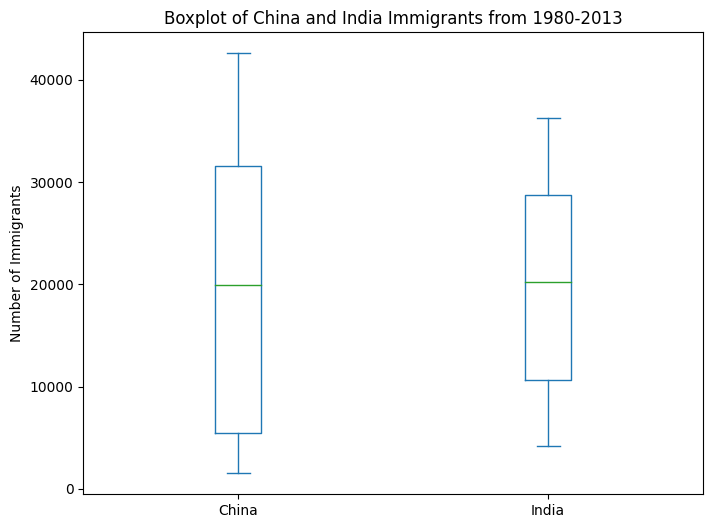

In [ ]:
ci=data.loc[['China', 'India'], years].transpose()

ci.plot(kind='box', figsize=(8,6))

plt.title('Boxplot of China and India Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

### **Contoh 3** => 2 box plot horizontal

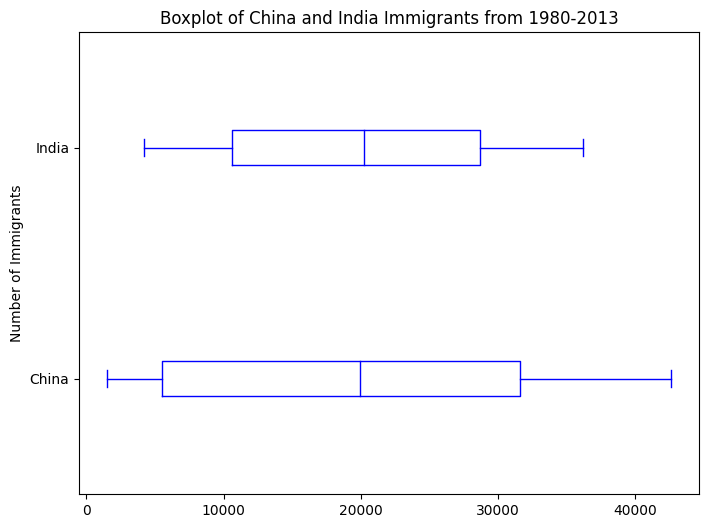

In [ ]:
ci.plot(kind='box', figsize=(8,6), vert=False, color='blue')

plt.title('Boxplot of China and India Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

# **Scatter Plots**

Scatter plot **mirip dengan line plot** yaitu memetakan variabel dependen dan independen pada grafik 2 D. Tetapi, pada scatter plot, data points tidak dihubungkan satu sama lain.

Pada kode **total = pd.DataFrame(data[years].sum(axis=0))**, kita menghitung **total dari setiap kolom** pada DataFrame data untuk kolom-kolom yang terdapat dalam years. Hasil perhitungan tersebut kemudian diubah menjadi sebuah DataFrame baru dengan menggunakan pd.DataFrame().

Selanjutnya, pada kode **total.index = map(int, tot.index)**, kita **mengubah tipe data indeks dari DataFrame total menjadi integer** dengan menggunakan fungsi map(int, total.index).

Terakhir, pada kode **total.reset_index(inplace=True)**, kita **mereset indeks DataFrame total agar indeksnya dimulai dari 0 dan diubah secara permanen dengan menggunakan inplace=True**.


**total.columns = ['year', 'total']**, kita **mengubah nama kolom** pada DataFrame total menjadi ‘year’ dan ‘total’

In [ ]:
total = pd.DataFrame(data[years].sum(axis=0))

total.index = map(int, total.index)

total.reset_index(inplace=True)

total.head(3)

,index,0
0,1980,99137
1,1981,110563
2,1982,104271


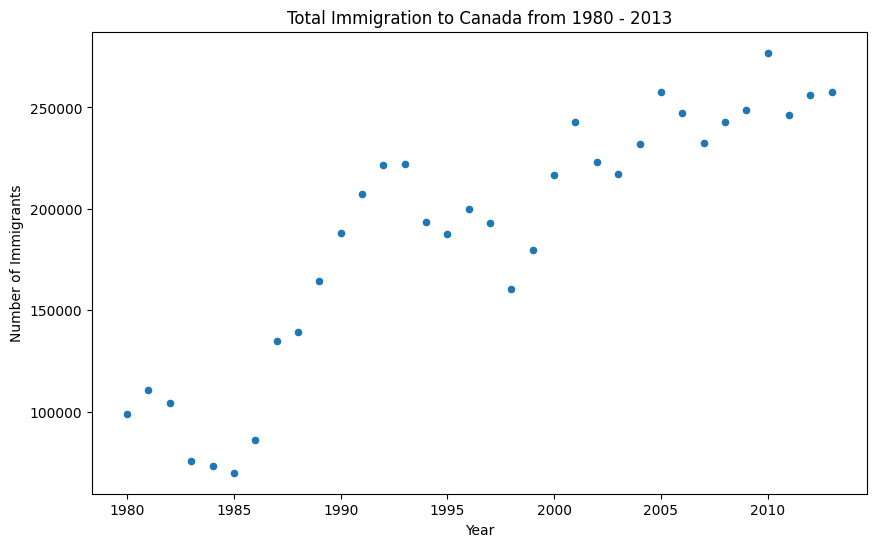

In [ ]:
total.columns = ['year', 'total']

total.plot(kind='scatter', x="year", y='total', figsize=(10,6))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

# **Bubble Plots**

In [ ]:
# Transpose data terlebih dahulu
years= list(map(str, range(1980, 2014)))
data2= data[years].transpose()
#data.index = map(int, data.index)

#data.index.name = 'Year'

#data.reset_index(inplace=True)
data2.head(5)



Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania,Haiti,Guyana,Portugal,Egypt,Morocco,Colombia,Iraq,Algeria,Israel,Bangladesh,Germany,Russian Federation,Mexico,Afghanistan,El Salvador,Ukraine,Trinidad and Tobago,Somalia,South Africa,Nigeria,Jordan,Ethiopia,Peru,Turkey,Syrian Arab Republic,Brazil,Japan,Netherlands,Ghana,Democratic Republic of the Congo,Malaysia,Australia,Bulgaria,Italy,Bosnia and Herzegovina,Chile,Venezuela (Bolivarian Republic of),Fiji,Cuba,Argentina,Guatemala,Sudan,Tunisia,Kenya,Ireland,Hungary,Cameroon,Albania,Mauritius,Switzerland,Republic of Moldova,Singapore,Indonesia,United Republic of Tanzania,Greece,Ecuador,Nicaragua,Dominican Republic,Belgium,Eritrea,New Zealand,Nepal,Saint Vincent and the Grenadines,"China, Hong Kong Special Administrative Region",Myanmar,Thailand,Grenada,Zimbabwe,Kazakhstan,Côte d'Ivoire,Burundi,Croatia,Belarus,Honduras,Senegal,Barbados,Rwanda,Cambodia,State of Palestine,Slovakia,Bhutan,Sweden,Spain,Austria,Libya,Guinea,Saint Lucia,Uruguay,The former Yugoslav Republic of Macedonia,Costa Rica,Czech Republic,Denmark,Togo,Uganda,Saudi Arabia,Uzbekistan,Sierra Leone,Armenia,Bolivia (Plurinational State of),Panama,Yemen,Benin,Finland,Liberia,Azerbaijan,Dominica,Lithuania,Kyrgyzstan,Norway,Latvia,Madagascar,Mali,Angola,Georgia,Burkina Faso,Kuwait,Paraguay,Serbia,Congo,Zambia,Chad,Djibouti,Malta,Seychelles,Cyprus,Lao People's Democratic Republic,Belize,Mauritania,Antigua and Barbuda,Niger,Mongolia,Gabon,Estonia,United Arab Emirates,Bahamas,Suriname,Saint Kitts and Nevis,Gambia,Brunei Darussalam,Iceland,Central African Republic,Slovenia,Tajikistan,Bahrain,Botswana,Democratic People's Republic of Korea,Namibia,Turkmenistan,Malawi,"China, Macao Special Administrative Region",Oman,Luxembourg,Cabo Verde,Comoros,Swaziland,Mozambique,Qatar,Tonga,Lesotho,Montenegro,Guinea-Bissau,Samoa,Papua New Guinea,Equatorial Guinea,Liechtenstein,Maldives,Monaco,Canada,Nauru,Andorra,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375,1666,2334,4473,612,325,266,262,80,1403,83,1626,0,409,16,110,0,958,7,1026,81,177,98,317,481,315,211,701,1889,172,15,786,702,24,1820,0,1233,103,632,306,368,114,20,58,291,781,205,9,1,306,806,0,241,186,635,1065,238,18,40,511,0,602,1,147,0,80,56,154,72,0,14,0,0,0,26,13,372,6,12,0,0,0,281,211,234,5,0,69,128,0,28,0,272,5,13,0,0,6,0,44,13,1,2,208,1,0,104,1,0,116,0,22,4,1,0,2,1,45,0,2,11,0,0,191,5,132,11,16,5,0,0,0,2,0,0,26,15,5,0,79,17,4,0,0,0,10,1,0,0,5,0,0,14,1,0,4,0,0,2,1,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438,3692,2943,3486,660,471,326,245,67,1711,84,1977,0,394,39,295,0,947,10,1118,60,160,59,456,874,419,220,756,1858,196,16,816,639,20,2057,0,1069,117,705,41,426,108,12,51,296,895,310,2,0,259,811,0,301,178,832,953,207,21,53,540,0,480,1,190,0,62,53,181,114,0,8,0,0,0,33,10,376,6,19,0,0,0,308,299,238,7,3,89,132,0,35,0,293,5,16,0,0,6,0,52,8,2,5,205,2,0,81,1,0,77,0,10,4,3,0,1,0,26,0,0,17,0,1,242,15,128,6,27,0,0,0,0,3,0,2,23,10,3,0,6,33,3,0,0,2,1,1,5,0,4,0,0,4,1,2,1,0,0,4,1,0,0,7,2,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583,3498,3575,2432,755,447,360,260,71,1334,86,3062,0,491,39,882,0,972,7,781,58,155,54,401,706,409,192,598,1852,98,17,813,484,12,1480,0,1078,174,814,94,626,113,11,55,221,707,397,16,0,353,634,0,337,252,621,897,184,27,104,519,0,364,6,202,0,46,113,231,102,0,10,0,0,0,30,9,299,8,26,0,0,0,222,260,201,9,3,133,146,0,42,0,299,2,17,1,0,7,0,42,14,1,4,170,2,0,94,0,0,106,0,13,7,6,0,3,8,32,0,1,11,1,1,153,3,84,16,13,3,0,1,0,2,0,2,38,21,0,1,8,10,1,0,0,1,3,3,5,0,6,0,0,2,2,2,1,7,0,7,1,0,0,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,733

In [ ]:
brazil= data["Brazil"]
brazil

KeyError: ignored

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14,8),
                    alpha=.5,
                    color='green',
                    s=norm_brazil * 2000 +10,
                    xlim=(1975, 2015))
# Argentina
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=.5,
                    color='blue',
                    s=norm_argentina * 2000 +10,
                    xlim=(1975, 2015),
                    ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Immigrations from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# **Subplot** => Menggunakan beberapa plot sekaligus

# **Tipe Plotting**



- **Scripting Layer**

top_5.plot( kind="area",
           figsize=(12,6),
           stacked= False)

plt.title("Top Immigrant in Canada by Origin")

plt.xlabel("Year")

plt.ylabel("People")

plt.show()







- **Artist Layer**

ax= top_5.plot( kind="area",
           figsize=(12,6),
           stacked= False
)

ax.set_title("Top Immigrant in Canada by Origin")

ax.set_xlabel("Year")

ax.set_label("People")

plt.show()

# **Metode Groupby()**

Rumus:

**DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True).**


- by: digunakan untuk menentukan kriteria pengelompokan. Nilai yang dapat digunakan adalah fungsi, label kolom, atau daftar label kolom.
- axis: menentukan apakah pengelompokan dilakukan berdasarkan baris (axis=0) atau kolom (axis=1).
- level: digunakan jika indeks DataFrame adalah MultiIndex (hierarchical). Digunakan untuk mengelompokkan berdasarkan level tertentu.
as_index: menentukan apakah hasil pengelompokan akan menggunakan indeks sebagai label grup. Jika as_index=False, maka hasilnya akan berupa DataFrame dengan indeks default.
- sort: menentukan apakah kelompok-kelompok akan diurutkan berdasarkan kunci pengelompokan.
- group_keys: menentukan apakah akan menyertakan kunci grup dalam indeks hasil pengelompokan.
- observed: hanya berlaku jika salah satu kriteria pengelompokan adalah Categoricals.


